In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'Default.csv'
).iloc[:,1:].dropna()

In [3]:
# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)
df.head()

,default,student,balance,income
0,-0.185599,-0.645936,-0.218835,0.813187
1,-0.185599,1.548141,-0.037616,-1.605496
2,-0.185599,-0.645936,0.492410,-0.131212
3,-0.185599,-0.645936,-0.632893,0.164031
4,-0.185599,-0.645936,-0.102791,0.370915


In [4]:
# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_train = df.iloc[:trainsize, :].copy()
df_test = df.iloc[trainsize:, :].copy()


Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

In [5]:
# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
# df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
# df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
# df_train['balance2'] = (df_train['balance'] + 100) ** 2
# df_train['balance3'] = (df_train['balance'] + 100) ** 3

In [6]:
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

In [7]:
# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
# df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
# df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
# df_test['balance2'] = (df_test['balance'] + 100) ** 2
# df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [8]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.450062579301185

Parameter estimates for the model with many features:
[-0.         -0.40657726 -0.         -0.         -0.          0.00114596]


In [9]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.44553225151184195


## Regularization parameter: Lasso

The $\lambda$ for lasso can var between 0 (no penalty, acts like OLS) and infinity.  If $\lambda$ is too large, all parameters will be set to zero.  

Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same $R^2$ for a given lambda value?

Submit your work and discuss the results with your mentor.

In [10]:
def lasso(alphas, x, y):
    '''Alphas are list of alphas (lambdas), x is training 
    data and y is training target, returns dataframe with coefficients for new alphas'''    
    
    special_lst = []
    for alpha in alphas:
        lasseau = linear_model.Lasso(alpha=alpha)
        lasseau.fit(x, y)
        special_lst.append(lasseau.coef_)
        
    special_df = pd.DataFrame(special_lst)
    
    special_df.columns = x.columns
    special_df['alpha'] = alphas
    
    return special_df

In [11]:
alphanator = list(map(lambda x: x/100.0, range(1, 50, 1)))

In [12]:
lasso_alpha = lasso(alphanator, X_train2, Y_train)

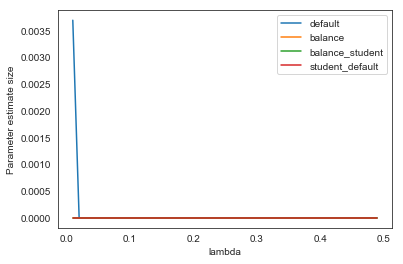

In [14]:
labels = []
for col in lasso_alpha.drop(columns=['alpha', 'student']):
    plt.plot(lasso_alpha['alpha'], lasso_alpha[col])
    labels.append(col)
    
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

In [16]:
def ridge(alphas, x, y):
    '''Alphas are list of alphas, x is training 
    data and y is training target'''
    
    special_lst = []
    for alpha in alphas:
        ridgid = linear_model.Ridge(alpha=alpha, normalize=True, fit_intercept=False)
        ridgid.fit(x, y)
        special_lst.append(ridgid.coef_.flatten().tolist())
        
    special_df = pd.DataFrame(special_lst)
    
    special_df.columns = x.columns
    special_df['alpha'] = alphas
    
    return special_df

In [20]:
ridge_alpha = ridge(alphanator, X_train2, Y_train)

,default,student,balance,balance_student,student_default,alpha
0,0.014388,-0.758687,0.000060,-0.003678,-0.002035,0.01
1,0.014388,-0.758685,0.000060,-0.003679,-0.002035,0.02
2,0.014388,-0.758684,0.000059,-0.003679,-0.002035,0.03
3,0.014388,-0.758682,0.000059,-0.003679,-0.002035,0.04
4,0.014388,-0.758680,0.000059,-0.003680,-0.002035,0.05
5,0.014388,-0.758679,0.000058,-0.003680,-0.002035,0.06
6,0.014388,-0.758677,0.000058,-0.003680,-0.002035,0.07
7,0.014388,-0.758675,0.000057,-0.003680,-0.002035,0.08
8,0.014388,-0.758674,0.000057,-0.003681,-0.002035,0.09
9,0.014388,-0.758672,0.000057,-0.003681,-0.002035,0.10


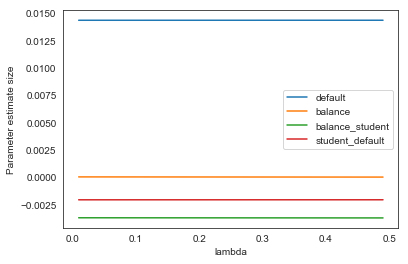

In [19]:
labels = []
for col in ridge_alpha.drop(columns=['alpha', 'student']):
    plt.plot(ridge_alpha['alpha'], ridge_alpha[col])
    labels.append(col)
    
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

Ok so for this one, changing lasso's lambda value by .01 makes more of a difference than it does for ridge when it comes to the coefficient sizes.

I need to see if they are yielding the same Rsquared values. And based on the following assignment, I doubt they will.

In [40]:
ridgereg = linear_model.Ridge(alpha=.5)
ridgid = ridgereg.fit(X_train2, Y_train)
ridge_y_pred = ridgid.predict(X_train2)

print(ridgid.coef_)
print(ridgid.intercept_)

[[ 1.43937614e-02 -7.58632794e-01  3.34766337e-05 -3.55765148e-03
  -2.05821206e-03]]
[-0.00057514]


In [39]:
lassoreg = linear_model.Lasso(alpha=.5)
lasseau = lassoreg.fit(X_train2, Y_train)
lasso_y_pred = lasseau.predict(X_train2)


print(lasseau.coef_)
print(lasseau.intercept_)



[-0.         -0.25561356 -0.         -0.         -0.        ]
[0.00220588]
